In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
titanic_df = pd.read_csv(os.getcwd() + '/Desktop/train.csv')
test_df = pd.read_csv(os.getcwd() + '/Desktop/test.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [6]:
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
titanic_df['Survived'].mean()

0.3838383838383838

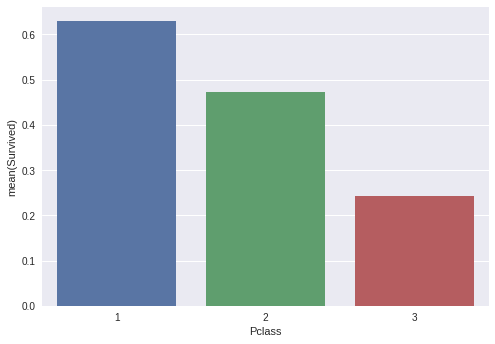

In [8]:
#pclass

pclass_perc = titanic_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=pclass_perc)

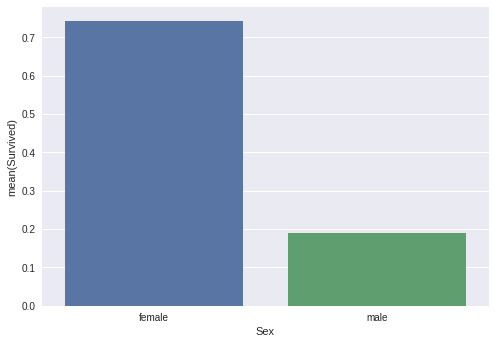

In [9]:
#Sex

sex_perc = titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=sex_perc)

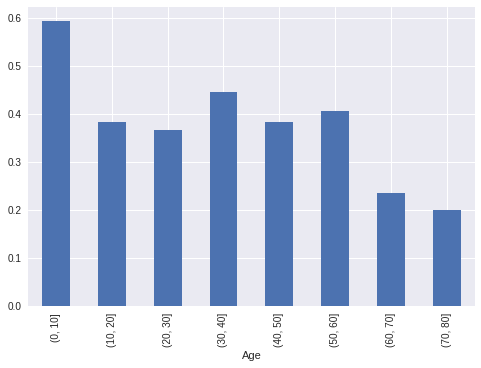

In [10]:
#Age
group_by_age = pd.cut(titanic_df["Age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

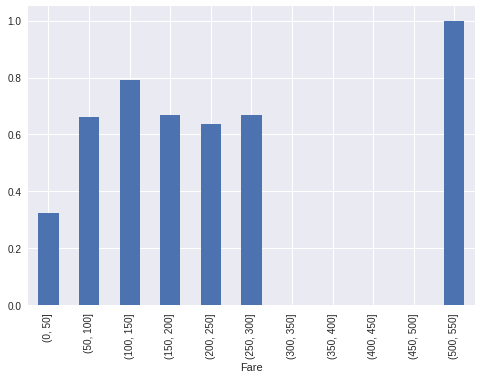

In [11]:
#Fare

titanic_df['Fare'] = titanic_df['Fare'].astype(int)
#titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

group_by_fare = pd.cut(titanic_df["Fare"], np.arange(0, 600, 50))
fare_grouping = titanic_df.groupby(group_by_fare).mean()
fare_grouping['Survived'].plot.bar()

test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

In [12]:
#Cabin

titanic_df = titanic_df.drop(['Cabin'], axis=1)
test_df.drop("Cabin",axis=1,inplace=True)

In [13]:
#Family

titanic_df["Family"] = titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df["Family"].loc[titanic_df["Family"] > 0] = 1
titanic_df["Family"].loc[titanic_df["Family"] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

/home/cal0x/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


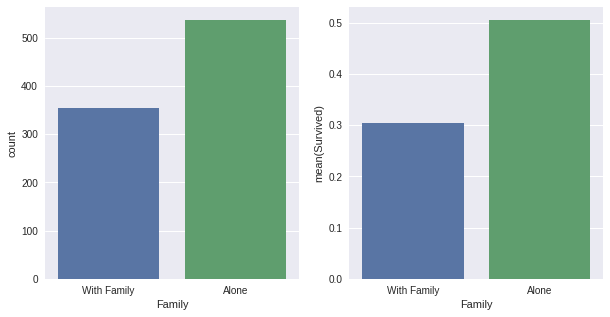

In [14]:
#plots

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x='Family', data=titanic_df, ax=axis1, order=[1, 0])
axis1.set_xticklabels(["With Family", "Alone"])

family_perc = titanic_df[["Family", "Survived"]].groupby(["Family"], as_index=False).mean()
sns.barplot(x="Family", y="Survived", data=family_perc, ax=axis2)
axis2.set_xticklabels(["With Family", "Alone"])

In [15]:
#embark data convertion

embark_dummy_titanic = pd.get_dummies(titanic_df['Embarked'])
titanic_df = titanic_df.join(embark_dummy_titanic)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
test_df    = test_df.join(embark_dummies_test)

In [16]:
titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

In [17]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare,Family,C,Q,S
0,0,3,male,22.0,7,1,0,0,1
1,1,1,female,38.0,71,1,1,0,0
2,1,3,female,26.0,7,0,0,0,1
3,1,1,female,35.0,53,1,0,0,1
4,0,3,male,35.0,8,0,0,0,1


In [18]:
#Sex data conversion

sex_dummy_titanic = pd.get_dummies(titanic_df['Sex'])
titanic_df = titanic_df.join(sex_dummy_titanic)
titanic_df.drop(['Sex'], axis=1, inplace=True)

sex_dummy_test = pd.get_dummies(test_df['Sex'])
test_df = test_df.join(sex_dummy_test)
test_df.drop(['Sex'], axis=1, inplace=True)

In [19]:
#Age null values conversion
average_age = titanic_df["Age"].mean()
std_age = titanic_df["Age"].std()
count_nan_age = titanic_df["Age"].isnull().sum()

titanic_df.info()

rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1

titanic_df['Age'] = titanic_df['Age'].astype(int)


average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

test_df["Age"][np.isnan(test_df["Age"])] = rand_2

test_df['Age']    = test_df['Age'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
Fare        891 non-null int64
Family      891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
female      891 non-null uint8
male        891 non-null uint8
dtypes: float64(1), int64(4), uint8(5)
memory usage: 39.2 KB


/home/cal0x/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/cal0x/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
Family      891 non-null int64
C           891 non-null uint8
Q           891 non-null uint8
S           891 non-null uint8
female      891 non-null uint8
male        891 non-null uint8
dtypes: int64(5), uint8(5)
memory usage: 39.2 KB


In [21]:
X_train = titanic_df.drop("Survived", axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [22]:
logreg = LogisticRegression(C=1)

logreg.fit(X_train, Y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
Y_pred = logreg.predict(X_test)

In [24]:
logreg.score(X_train, Y_train)

0.79797979797979801

In [25]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)


0.96969696969696972